Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Patient Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,P1,6,148,72,35,0,33.6,0.627,50,1
1,P2,1,85,66,29,0,26.6,0.351,31,0
2,P3,8,183,64,0,0,23.3,0.672,32,1
3,P4,1,89,66,23,94,28.1,0.167,21,0
4,P5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 10)

In [5]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [7]:
print(diabetes_dataset.dtypes)


Patient Id                   object
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [8]:
diabetes_dataset = diabetes_dataset.apply(pd.to_numeric, errors='coerce')


In [9]:
diabetes_dataset = diabetes_dataset.fillna(0)  # Replace NaNs with 0
# Or use another strategy, e.g., diabetes_dataset = diabetes_dataset.dropna()


In [10]:
result = diabetes_dataset.groupby('Outcome').mean()
print(result)


         Patient Id  Pregnancies     Glucose  BloodPressure  SkinThickness  \
Outcome                                                                      
0               0.0     3.298000  109.980000      68.184000      19.664000   
1               0.0     4.865672  141.257463      70.824627      22.164179   

            Insulin        BMI  DiabetesPedigreeFunction        Age  
Outcome                                                              
0         68.792000  30.304200                  0.429734  31.190000  
1        100.335821  35.142537                  0.550500  37.067164  


In [11]:
diabetes_dataset.groupby('Outcome').mean()

,Patient Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,,
0,0.0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,0.0,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [13]:
print(X)

     Patient Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0.0            6      148             72             35        0   
1           0.0            1       85             66             29        0   
2           0.0            8      183             64              0        0   
3           0.0            1       89             66             23       94   
4           0.0            0      137             40             35      168   
..          ...          ...      ...            ...            ...      ...   
763         0.0           10      101             76             48      180   
764         0.0            2      122             70             27        0   
765         0.0            5      121             72             23      112   
766         0.0            1      126             60              0        0   
767         0.0            1       93             70             31        0   

      BMI  DiabetesPedigreeFunction  Ag

In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(768, 9) (614, 9) (154, 9)


Training the Model

In [17]:
classifier = svm.SVC(kernel='linear')

In [18]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [19]:
# number of rows and columns in the dataframe
diabetes_dataset.shape

(768, 10)

In [20]:
diabetes_dataset.isnull()

,Patient Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False


In [21]:
diabetes_dataset.isnull()

,Patient Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False


<Axes: >

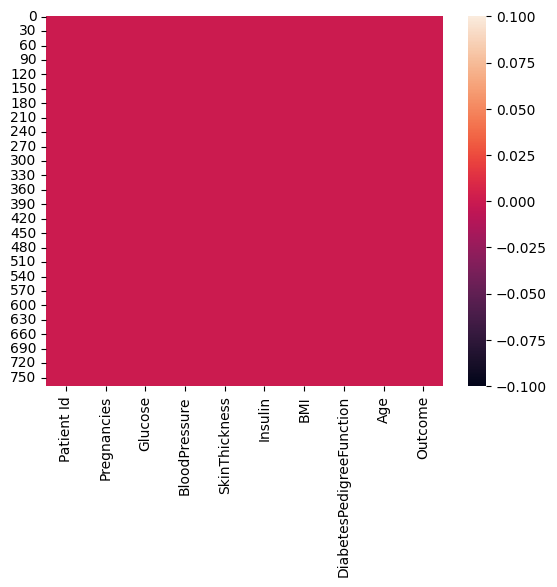

In [22]:
import seaborn as sns
sns.heatmap(diabetes_dataset.isnull())

Model Evaluation

<Axes: xlabel='Glucose', ylabel='count'>

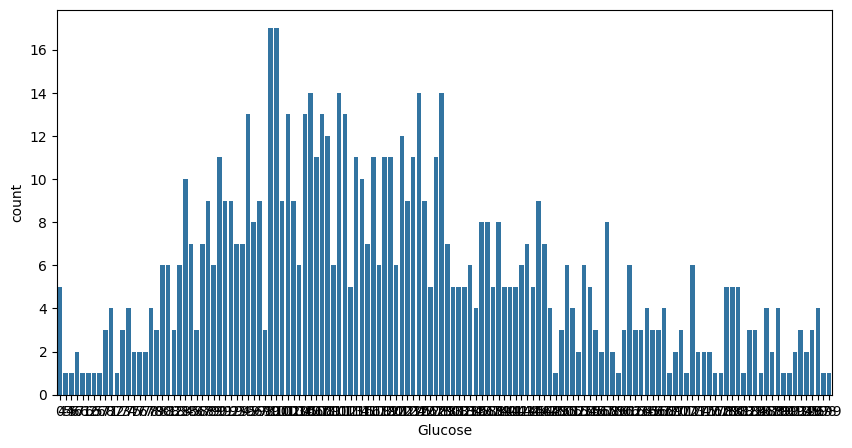

In [23]:
from matplotlib import pyplot as plt


plt.figure(figsize=(10,5))
sns.countplot(x='Glucose',data=diabetes_dataset)

Accuracy Score

In [24]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [25]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [26]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [27]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [28]:
import plotly.graph_objects as go

In [29]:
label = diabetes_dataset.Age.sort_values().unique()


In [30]:
# Assuming diabetes_dataset is your DataFrame

# Sort and get unique values from the 'age' column
label = diabetes_dataset['Age'].sort_values().unique()

# Assign the target column to target variable, assuming the target column is 'target'
target = diabetes_dataset['SkinThickness']

# Printing to verify the results
print("Unique ages:", label)
print("Target variable:", target.head())


Unique ages: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 72 81]
Target variable: 0    35
1    29
2     0
3    23
4    35
Name: SkinThickness, dtype: int64


In [31]:
label = diabetes_dataset.Age.sort_values().unique()       
target = diabetes_dataset['SkinThickness']  # Accessing SkinThickness column


In [32]:
target = diabetes_dataset[diabetes_dataset['SkinThickness'] > 0]['SkinThickness']


In [33]:
fig = go.Figure()
fig.add_trace(go.Bar(x=label,y=target))
fig.update_layout(title = 'Diabetes Patients ',xaxis=dict(title='Age'),yaxis=dict(title='SkinThickness'))
fig.show()

In [34]:
import numpy as np

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import log_loss, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np 
acc_dict = {}
# create the data
X = diabetes_dataset.drop('Age',axis = 1)
y = diabetes_dataset['Glucose']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [36]:
# from matplotlib import pyplot as plt
# from sklearn.ensemble import  RandomForestClassifier
# # create model
# model = RandomForestClassifier()

# # fit the data in the model
# model.fit(X_train,y_train)

# y_pred_randomF = model.predict(X_test)
# print('Accuracy score : ',accuracy_score(y_test, y_pred_randomF)*100)

# acc_dict['RFC_log_loss'] = log_loss(y_test, y_pred_randomF)
# acc_dict['RFC_F!1_Score'] = f1_score(y_test, y_pred_randomF,average='weighted')
# # prediction visualization
# plt.imshow(np.log(confusion_matrix(y_test,y_pred_randomF)),cmap = 'Blues',interpolation = 'nearest')
# plt.ylabel('True')
# plt.xlabel('Predicted')
# plt.show()

## KMeans Clustering

Accuracy score: 0.005208333333333333


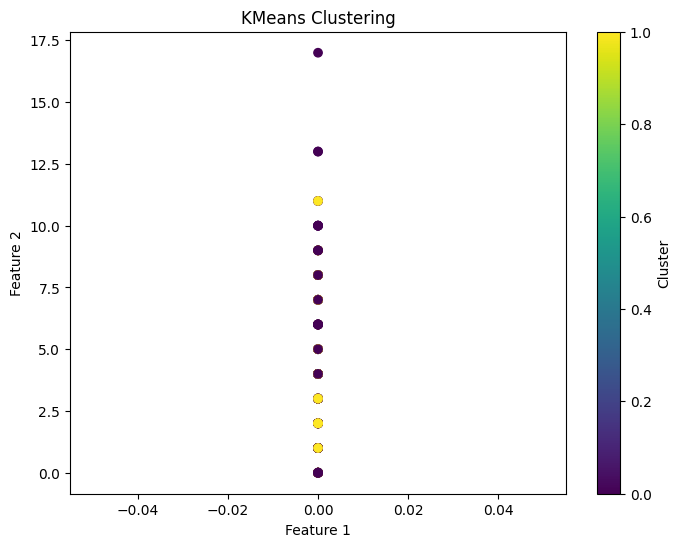

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your training and test data
# Replace them with your actual data

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize KMeans model
kmeans = KMeans(n_clusters=2)  # Assuming 2 clusters, you can adjust this number

# Fit KMeans model on the imputed training data
kmeans.fit(X_train_imputed)

# Predict clusters for the test data
clusters = kmeans.predict(X_test_imputed)

# Calculate accuracy score (if true labels are available)
accuracy = accuracy_score(y_test, clusters)  # Replace y_test with your actual labels
print('Accuracy score:', accuracy)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_test_imputed[:, 0], X_test_imputed[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()


## Decision Tree Classifier

In [38]:
# from sklearn.tree import DecisionTreeClassifier
# tree_ = DecisionTreeClassifier()
# tree_.fit(X_train,y_train)
# y_pred = tree_.predict(X_test)
# print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
# acc_dict['Tree_log_loss'] = log_loss(y_test,y_pred)
# acc_dict['Tree_f!1_score'] = f1_score(y_test,y_pred)

# # prediction visualization
# plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'Blues',interpolation = 'nearest')
# plt.ylabel('True')
# plt.xlabel('Predicted')
# plt.show()

## Support Vector Classifier

Accuracy score : 1.0416666666666665


C:\Users\taffa\AppData\Local\Temp\ipykernel_20044\4228291085.py:18: RuntimeWarning:

divide by zero encountered in log



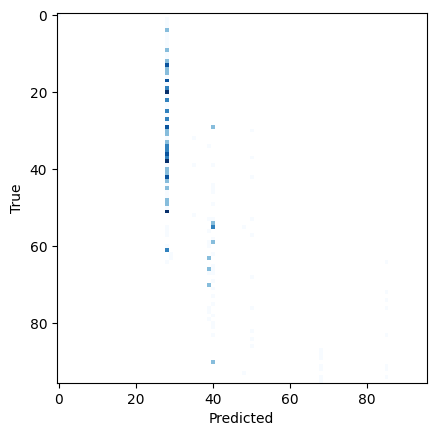

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

model = SVC()
model.fit(X_train_imputed, y_train)

X_test_imputed = imputer.transform(X_test)
y_pred = model.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score :', accuracy * 100)

# prediction visualization
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


Making a Predictive System

In [40]:
import numpy as np
from sklearn.svm import SVC

# Assuming 'classifier' is your trained SVC model

# Example training data shape (replace with actual shape)
# X_train.shape = (n_samples, 10)

# Input data (should have 10 features)
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51, 0)  # Adjust this tuple to have the correct number of features

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make a prediction
prediction = classifier.predict(input_data_reshaped)
print(prediction)

# Output the prediction
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


[1]

C:\Users\taffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names




The person is diabetic


In [41]:
# input_data = (5,166,72,19,175,25.8,0.587,51)

# # changing the input_data to numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# # reshape the array as we are predicting for one instance
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction = classifier.predict(input_data_reshaped)
# print(prediction)

# if (prediction[0] == 0):
#   print('The person is not diabetic')
# else:
#   print('The person is diabetic')

Saving the trained model

In [42]:
import pickle

In [43]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [44]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [45]:
input_data = (5,166,72,19,175,25.8,0.587,51,45)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\taffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [46]:
for column in X.columns:
  print(column)

Patient Id
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Outcome


# Accuracy Report

|   Algorithm                  |   Accuracy score  |      
|------------------------------|-------------------|
|          RFC                 |      100.00       |       
|   Decision Tree Classifier   |      100.00       | 
|   Support Vector Classifier  |      70.00        |      
